# 💡  Smart Gym Body Requirements Calculator 🧠💪

Say hello to your next-gen gym buddy! The Smart Gym Body Requirements Calculator uses fuzzy logic to take the guesswork out of fitness by delivering tailored metrics for serious lifters.

🎯 What it does:

## 🏋️ Calculates your Bodybuilder Rate—a smart score reflecting physique, performance, and progress.

## 🍗 Determines your Exact Protein Requirements for maximum muscle growth and recovery.

Whether you're bulking, shredding, or just keeping gains steady, this tool makes sure your body gets exactly what it needs. Let’s fuel those results with precision and power! 🚀🔥🥩

define both input and ouput fuzzy variables 

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

bodyFat = ctrl.Antecedent(np.arange(8, 37, 1), 'bodyFat')
height = ctrl.Antecedent(np.arange(140, 196, 1), 'height')
weight = ctrl.Antecedent(np.arange(40, 131, 1), 'weight')


bodyRate = ctrl.Consequent(np.arange(0, 101, 1), 'bodyRate')
neededProtenAmount = ctrl.Consequent(np.arange(1.6, 2.7, 0.1), 'neededProtenAmount')

divide the fuzzy variables ranges into sub ranges 

In [6]:

height['low'] = fuzz.trapmf(
    height.universe,
    [140, 140, 155, 165]   # [a, b, c, d]
)   
height['medium'] = fuzz.gbellmf(height.universe, 10, 4, 165)  # a=10, b=4, c=170
height['high'] = fuzz.trapmf(
    height.universe,
    [170, 185, 195, 195]   # [a, b, c, d]
)


weight['low']    = fuzz.trimf(weight.universe, [40,  40,  65])
weight['medium'] = fuzz.trimf(weight.universe, [55,  75,  95])
weight['high']   = fuzz.trimf(weight.universe, [85, 130, 130])

bodyRate['bad']      = fuzz.trimf(bodyRate.universe, [0,  0,  50])
bodyRate['good']     = fuzz.trimf(bodyRate.universe, [30, 50, 70])
bodyRate['athletic'] = fuzz.trimf(bodyRate.universe, [60,100,100])

neededProtenAmount['low']    = fuzz.trapmf(neededProtenAmount.universe, [1.6, 1.6,1.9, 2.0])
neededProtenAmount['medium'] = fuzz.trimf(neededProtenAmount.universe, [1.8, 2.1, 2.3])
neededProtenAmount['high'] = fuzz.trapmf(
    neededProtenAmount.universe,
    [2.1, 2.4, 2.61, 2.61]   # a, b, c, d
)

bodyFat['low'] = fuzz.gaussmf(bodyFat.universe, 8, 3)  # mean=8, sigma=3
bodyFat['medium']    = fuzz.gaussmf(bodyFat.universe, 20,   3)   # مركز عند 20، عرض ≈4
bodyFat['high']      = fuzz.gaussmf(bodyFat.universe, 28,   2)   # مركز عند 30، عرض ≈3
bodyFat['very_high'] = fuzz.trimf(bodyFat.universe, [30, 36,  36])

view membership functions

c:\Users\USER\anaconda3\envs\PythonEX\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


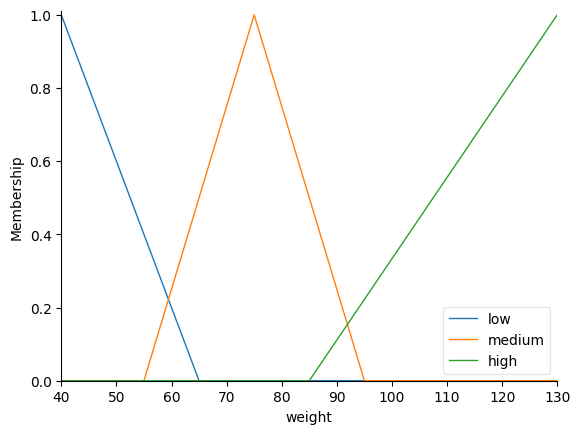

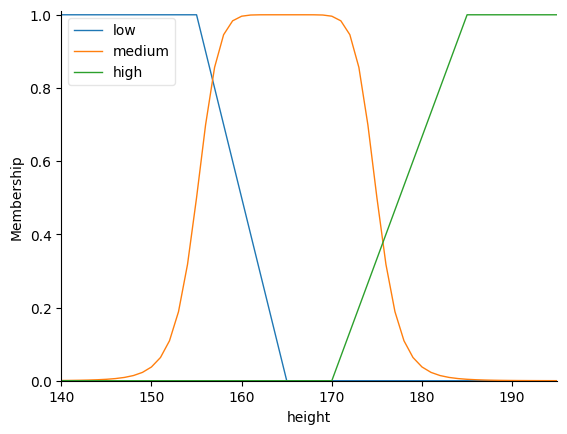

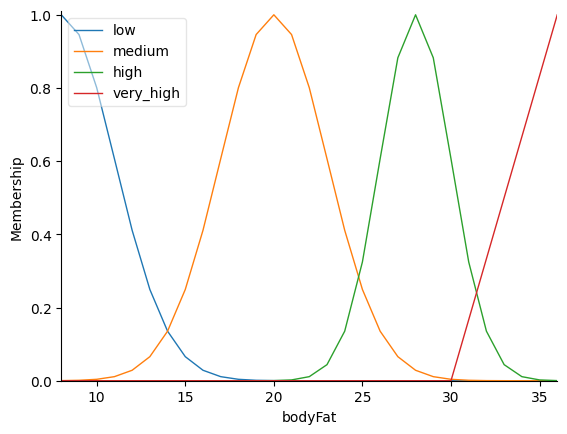

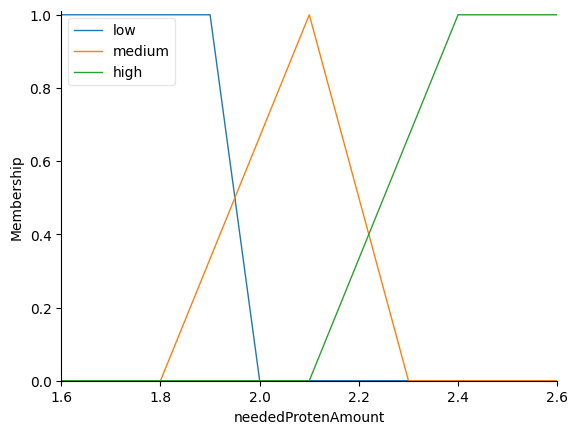

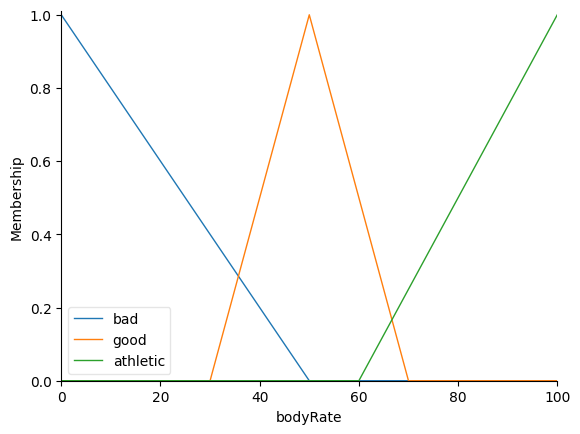

In [7]:
weight.view()
height.view()
bodyFat.view()
neededProtenAmount.view()
bodyRate.view()

###  Rules

In [8]:
# Rule definitions based on fuzzy table

rule1_d = ctrl.Rule(
    bodyFat['very_high'] & weight['high'] & (height['medium'] | height['low']),
    consequent=(neededProtenAmount['low'], bodyRate['bad'])
)

rule2_d = ctrl.Rule(
    bodyFat['very_high'] & weight['high'] & height['high'],
    consequent=(neededProtenAmount['low'], bodyRate['bad'])
)

rule3_d = ctrl.Rule(
    bodyFat['very_high'] & ~weight['high'],
    consequent=(neededProtenAmount['medium'], bodyRate['bad'])
)

rule4_d = ctrl.Rule(
    bodyFat['high'] & weight['high'] & (height['medium'] | height['low']),
    consequent=(neededProtenAmount['low'], bodyRate['bad'])
)

rule5_d = ctrl.Rule(
    bodyFat['high'] & weight['high'] & height['high'],
    consequent=(neededProtenAmount['medium'], bodyRate['bad'])
)

rule6_d = ctrl.Rule(
    bodyFat['high'] & weight['medium'] & height['high'],
    consequent=(neededProtenAmount['medium'], bodyRate['good'])
)

rule7_d = ctrl.Rule(
    bodyFat['high'] & weight['medium'] & (height['medium'] | height['low']),
    consequent=(neededProtenAmount['medium'], bodyRate['bad'])
)

rule8_d = ctrl.Rule(
    bodyFat['high'] & weight['low'],
    consequent=(neededProtenAmount['medium'], bodyRate['good'])
)

rule9_d = ctrl.Rule(
    bodyFat['medium'] & weight['high'],
    consequent=(neededProtenAmount['medium'], bodyRate['athletic'])
)

rule10_d = ctrl.Rule(
    bodyFat['medium'] & weight['medium'] & height['high'],
    consequent=(neededProtenAmount['high'], bodyRate['good'])
)

rule11_d = ctrl.Rule(
    bodyFat['medium'] & weight['medium'] & (height['medium'] | height['low']),
    consequent=(neededProtenAmount['medium'], bodyRate['good'])
)

rule12_d = ctrl.Rule(
    bodyFat['medium'] & weight['low'] & height['high'],
    consequent=(neededProtenAmount['high'], bodyRate['good'])
)

rule13_d = ctrl.Rule(
    bodyFat['medium'] & weight['low'] & (height['medium'] | height['low']),
    consequent=(neededProtenAmount['medium'], bodyRate['good'])
)

rule14_d = ctrl.Rule(
    bodyFat['low'] & weight['high'] & (height['medium'] | height['low']),
    consequent=(neededProtenAmount['medium'], bodyRate['good'])
)

rule15_d = ctrl.Rule(
    bodyFat['low'] & weight['high'] & height['high'],
    consequent=(neededProtenAmount['high'], bodyRate['good'])
)

rule16_d = ctrl.Rule(
    bodyFat['low'] & weight['medium'] & (height['medium'] | height['high']),
    consequent=(neededProtenAmount['high'], bodyRate['athletic'])
)

rule17_d = ctrl.Rule(
    bodyFat['low'] & weight['medium'] & height['low'],
    consequent=(neededProtenAmount['medium'], bodyRate['good'])
)

rule18_d = ctrl.Rule(
    bodyFat['low'] & weight['low'] & (height['medium'] | height['high']),
    consequent=(neededProtenAmount['high'], bodyRate['athletic'])
)

rule19_d = ctrl.Rule(
    bodyFat['low'] & weight['low'] & height['low'],
    consequent=(neededProtenAmount['medium'], bodyRate['good'])
)


### Rules extend

In [9]:
# --------------------------------------------------
# VERY HIGH bodyFat continued
# --------------------------------------------------

# 17. very_high & low weight & high height
rule17_c = ctrl.Rule(
    bodyFat['very_high'] & weight['low'] & height['high'],
    consequent=(neededProtenAmount['medium'], bodyRate['bad'])
)

# 18. very_high & medium weight & high height
rule18_c = ctrl.Rule(
    bodyFat['very_high'] & weight['medium'] & height['high'],
    consequent=(neededProtenAmount['low'], bodyRate['bad'])
)

# 19. very_high & low weight & low height
rule19_c = ctrl.Rule(
    bodyFat['very_high'] & weight['low'] & height['low'],
    consequent=(neededProtenAmount['high'], bodyRate['bad'])
)

# 20. very_high & medium weight & low height
rule20_c = ctrl.Rule(
    bodyFat['very_high'] & weight['medium'] & height['low'],
    consequent=(neededProtenAmount['medium'], bodyRate['bad'])
)


# --------------------------------------------------
# HIGH bodyFat continued
# --------------------------------------------------

# 21. high & low weight & low height
rule21_c = ctrl.Rule(
    bodyFat['high'] & weight['low'] & height['low'],
    consequent=(neededProtenAmount['high'], bodyRate['bad'])
)

# 22. high & low weight & medium height
rule22_c = ctrl.Rule(
    bodyFat['high'] & weight['low'] & height['medium'],
    consequent=(neededProtenAmount['medium'], bodyRate['bad'])
)

# 23. high & medium weight & low height
rule23_c = ctrl.Rule(
    bodyFat['high'] & weight['medium'] & height['low'],
    consequent=(neededProtenAmount['medium'], bodyRate['good'])
)

# 24. high & medium weight & medium height
rule24_c = ctrl.Rule(
    bodyFat['high'] & weight['medium'] & height['medium'],
    consequent=(neededProtenAmount['medium'], bodyRate['good'])
)

# 25. high & medium weight & high height
rule25_c = ctrl.Rule(
    bodyFat['high'] & weight['medium'] & height['high'],
    consequent=(neededProtenAmount['low'], bodyRate['good'])
)


# --------------------------------------------------
# MEDIUM bodyFat continued
# --------------------------------------------------

# 26. medium & high weight & medium height
rule26_c = ctrl.Rule(
    bodyFat['medium'] & weight['high'] & height['medium'],
    consequent=(neededProtenAmount['medium'], bodyRate['good'])
)

# 27. medium & low weight & high height
rule27_c = ctrl.Rule(
    bodyFat['medium'] & weight['low'] & height['high'],
    consequent=(neededProtenAmount['high'], bodyRate['good'])
)

# 28. medium & medium weight & medium height
rule28_c = ctrl.Rule(
    bodyFat['medium'] & weight['medium'] & height['medium'],
    consequent=(neededProtenAmount['medium'], bodyRate['athletic'])
)

# 29. medium & low weight & medium height
rule29_c = ctrl.Rule(
    bodyFat['medium'] & weight['low'] & height['medium'],
    consequent=(neededProtenAmount['medium'], bodyRate['athletic'])
)

# 30. medium & medium weight & high height
rule30_c = ctrl.Rule(
    bodyFat['medium'] & weight['medium'] & height['high'],
    consequent=(neededProtenAmount['high'], bodyRate['good'])
)


# --------------------------------------------------
# LOW bodyFat continued
# --------------------------------------------------

# 31. low & low weight & medium height
rule31_c = ctrl.Rule(
    bodyFat['low'] & weight['low'] & height['medium'],
    consequent=(neededProtenAmount['high'], bodyRate['athletic'])
)

# 32. low & low weight & high height
rule32_c = ctrl.Rule(
    bodyFat['low'] & weight['low'] & height['high'],
    consequent=(neededProtenAmount['high'], bodyRate['athletic'])
)

# 33. low & medium weight & low height
rule33_c = ctrl.Rule(
    bodyFat['low'] & weight['medium'] & height['low'],
    consequent=(neededProtenAmount['high'], bodyRate['good'])
)

# 34. low & medium weight & medium height
rule34_c = ctrl.Rule(
    bodyFat['low'] & weight['medium'] & height['medium'],
    consequent=(neededProtenAmount['high'], bodyRate['athletic'])
)

# 35. low & high weight & medium height
rule35_c = ctrl.Rule(
    bodyFat['low'] & weight['high'] & height['medium'],
    consequent=(neededProtenAmount['medium'], bodyRate['athletic'])
)


# --------------------------------------------------
# Cross-over / Edge Case rules (Mixed scenarios)
# --------------------------------------------------

# 36. high bodyFat & high weight & low height
rule36_c = ctrl.Rule(
    bodyFat['high'] & weight['high'] & height['low'],
    consequent=(neededProtenAmount['medium'], bodyRate['bad'])
)

# 37. medium bodyFat & low weight & low height
rule37_c = ctrl.Rule(
    bodyFat['medium'] & weight['low'] & height['low'],
    consequent=(neededProtenAmount['low'], bodyRate['good'])
)

# 38. very_high bodyFat & high weight & medium height
rule38_c = ctrl.Rule(
    bodyFat['very_high'] & weight['high'] & height['medium'],
    consequent=(neededProtenAmount['low'], bodyRate['bad'])
)

# 39. low bodyFat & medium weight & high height
rule39_c = ctrl.Rule(
    bodyFat['low'] & weight['medium'] & height['high'],
    consequent=(neededProtenAmount['medium'], bodyRate['athletic'])
)

# 40. high bodyFat & medium weight & medium height
rule40_c = ctrl.Rule(
    bodyFat['high'] & weight['medium'] & height['medium'],
    consequent=(neededProtenAmount['medium'], bodyRate['good'])
)


In [10]:
data = []

Get external data_set and fix it in order to test our fuzzy project accuracy

يتم تحميل قاعدة البيانات و من ثم تحويلها إلى مصفوفة و تم إنشاء خلية إاضافية تحتوي على قاعدة البيانات في حالة عدم القدرة على الوصول لقاعدة البيانات 

In [11]:
data_copy = [{'height': 172.1, 'weight': 70.0, 'body_fat': 12.3, 'body_rate': 72.2, 'needed_protein': 2.4}, {'height': 168.3, 'weight': 69.9, 'body_fat': 25.3, 'body_rate': 46.0, 'needed_protein': 2.3}, {'height': 183.5, 'weight': 83.8, 'body_fat': 10.4, 'body_rate': 71.5, 'needed_protein': 2.4}, {'height': 181.0, 'weight': 83.6, 'body_fat': 28.7, 'body_rate': 46.73562112023187, 'needed_protein': 2.2}, {'height': 189.9, 'weight': 95.4, 'body_fat': 20.9, 'body_rate': 90.18691936316868, 'needed_protein': 2.3}, {'height': 177.2, 'weight': 82.1, 'body_fat': 19.2, 'body_rate': 51.1, 'needed_protein': 2.3}, {'height': 184.2, 'weight': 79.8, 'body_fat': 12.4, 'body_rate': 73.7, 'needed_protein': 2.4}, {'height': 186.7, 'weight': 89.9, 'body_fat': 11.7, 'body_rate': 82.59693599588915, 'needed_protein': 2.4}, {'height': 176.5, 'weight': 81.9, 'body_fat': 20.8, 'body_rate': 44.80426088325832, 'needed_protein': 2.3}, {'height': 181.0, 'weight': 93.1, 'body_fat': 21.2, 'body_rate': 76.57918623748432, 'needed_protein': 2.3}, {'height': 176.5, 'weight': 85.2, 'body_fat': 22.1, 'body_rate': 41.4, 'needed_protein': 2.3}, {'height': 180.3, 'weight': 88.8, 'body_fat': 29.0, 'body_rate': 30.4, 'needed_protein': 2.2}, {'height': 180.3, 'weight': 94.9, 'body_fat': 22.9, 'body_rate': 78.32299365954412, 'needed_protein': 2.3}, {'height': 186.7, 'weight': 96.0, 'body_fat': 16.5, 'body_rate': 84.59660511123289, 'needed_protein': 2.4}, {'height': 177.2, 'weight': 90.9, 'body_fat': 15.2, 'body_rate': 46.6, 'needed_protein': 2.4}, {'height': 173.4, 'weight': 63.6, 'body_fat': 15.6, 'body_rate': 65.9, 'needed_protein': 2.4}, {'height': 177.8, 'weight': 67.5, 'body_fat': 17.7, 'body_rate': 63.7, 'needed_protein': 2.3}, {'height': 172.1, 'weight': 68.6, 'body_fat': 14.0, 'body_rate': 71.2, 'needed_protein': 2.4}, {'height': 171.4, 'weight': 67.1, 'body_fat': 22.9, 'body_rate': 57.6, 'needed_protein': 2.3}, {'height': 175.3, 'weight': 72.9, 'body_fat': 8.8, 'body_rate': 78.0, 'needed_protein': 2.4}, {'height': 187.3, 'weight': 82.6, 'body_fat': 11.9, 'body_rate': 74.7, 'needed_protein': 2.4}, {'height': 181.0, 'weight': 76.2, 'body_fat': 11.8, 'body_rate': 75.4, 'needed_protein': 2.4}, {'height': 180.3, 'weight': 99.1, 'body_fat': 21.3, 'body_rate': 81.35725296020506, 'needed_protein': 2.3}, {'height': 186.7, 'weight': 112.2, 'body_fat': 32.3, 'body_rate': 18.7, 'needed_protein': 2.2}, {'height': 170.2, 'weight': 92.1, 'body_fat': 32.6, 'body_rate': 17.0, 'needed_protein': 2.2}, {'height': 174.6, 'weight': 119.2, 'body_fat': 34.5, 'body_rate': 21.20093695899465, 'needed_protein': 2.2}, {'height': 177.8, 'weight': 98.4, 'body_fat': 31.6, 'body_rate': 17.8, 'needed_protein': 2.2}, {'height': 181.6, 'weight': 96.2, 'body_fat': 32.0, 'body_rate': 21.5, 'needed_protein': 2.2}, {'height': 186.1, 'weight': 74.5, 'body_fat': 13.9, 'body_rate': 71.5, 'needed_protein': 2.4}, {'height': 171.4, 'weight': 60.6, 'body_fat': 10.8, 'body_rate': 71.7, 'needed_protein': 2.4}, {'height': 174.0, 'weight': 61.6, 'body_fat': 13.6, 'body_rate': 66.1, 'needed_protein': 2.4}, {'height': 183.5, 'weight': 71.8, 'body_fat': 10.2, 'body_rate': 76.6, 'needed_protein': 2.4}, {'height': 172.1, 'weight': 62.3, 'body_fat': 8.0, 'body_rate': 78.0, 'needed_protein': 2.4}, {'height': 182.9, 'weight': 89.8, 'body_fat': 22.6, 'body_rate': 43.2, 'needed_protein': 2.3}, {'height': 179.7, 'weight': 91.9, 'body_fat': 31.5, 'body_rate': 24.1, 'needed_protein': 2.2}, {'height': 186.1, 'weight': 98.0, 'body_fat': 26.1, 'body_rate': 31.9, 'needed_protein': 2.3}, {'height': 174.0, 'weight': 81.1, 'body_fat': 29.8, 'body_rate': 30.6, 'needed_protein': 2.2}, {'height': 178.4, 'weight': 87.7, 'body_fat': 30.7, 'body_rate': 27.6, 'needed_protein': 2.2}, {'height': 170.2, 'weight': 80.7, 'body_fat': 25.8, 'body_rate': 32.6, 'needed_protein': 2.3}, {'height': 177.8, 'weight': 93.2, 'body_fat': 32.3, 'body_rate': 19.9, 'needed_protein': 2.2}, {'height': 179.7, 'weight': 68.7, 'body_fat': 21.5, 'body_rate': 57.2, 'needed_protein': 2.3}, {'height': 181.6, 'weight': 70.2, 'body_fat': 13.8, 'body_rate': 70.3, 'needed_protein': 2.4}, {'height': 181.6, 'weight': 71.1, 'body_fat': 12.9, 'body_rate': 72.9, 'needed_protein': 2.4}, {'height': 181.6, 'weight': 76.0, 'body_fat': 24.3, 'body_rate': 55.5, 'needed_protein': 2.3}, {'height': 187.3, 'weight': 72.9, 'body_fat': 8.5, 'body_rate': 77.7, 'needed_protein': 2.4}, {'height': 162.6, 'weight': 56.7, 'body_fat': 13.5, 'body_rate': 69.5, 'needed_protein': 2.4}, {'height': 167.0, 'weight': 64.9, 'body_fat': 11.8, 'body_rate': 74.0, 'needed_protein': 2.4}, {'height': 171.4, 'weight': 67.2, 'body_fat': 18.5, 'body_rate': 64.8, 'needed_protein': 2.3}, {'height': 176.5, 'weight': 73.7, 'body_fat': 8.8, 'body_rate': 78.4, 'needed_protein': 2.4}, {'height': 178.4, 'weight': 73.1, 'body_fat': 21.5, 'body_rate': 60.1, 'needed_protein': 2.3}, {'height': 175.9, 'weight': 77.7, 'body_fat': 18.8, 'body_rate': 55.8, 'needed_protein': 2.3}, {'height': 172.1, 'weight': 74.3, 'body_fat': 31.4, 'body_rate': 36.9, 'needed_protein': 2.2}, {'height': 170.8, 'weight': 68.2, 'body_fat': 26.8, 'body_rate': 14.907861385426113, 'needed_protein': 2.3}, {'height': 184.8, 'weight': 86.3, 'body_fat': 18.4, 'body_rate': 56.7, 'needed_protein': 2.3}, {'height': 177.8, 'weight': 77.5, 'body_fat': 27.0, 'body_rate': 44.7, 'needed_protein': 2.3}, {'height': 175.9, 'weight': 76.2, 'body_fat': 27.0, 'body_rate': 44.1, 'needed_protein': 2.3}, {'height': 171.4, 'weight': 75.7, 'body_fat': 26.6, 'body_rate': 39.7, 'needed_protein': 2.3}, {'height': 170.8, 'weight': 71.6, 'body_fat': 14.9, 'body_rate': 64.1, 'needed_protein': 2.4}, {'height': 185.4, 'weight': 79.8, 'body_fat': 14.1, 'body_rate': 72.2, 'needed_protein': 2.4}, {'height': 177.8, 'weight': 80.3, 'body_fat': 20.5, 'body_rate': 52.0, 'needed_protein': 2.3}, {'height': 176.5, 'weight': 81.5, 'body_fat': 18.2, 'body_rate': 52.7, 'needed_protein': 2.3}, {'height': 182.2, 'weight': 87.3, 'body_fat': 24.9, 'body_rate': 41.5, 'needed_protein': 2.3}, {'height': 186.1, 'weight': 85.6, 'body_fat': 9.6, 'body_rate': 73.7, 'needed_protein': 2.4}, {'height': 168.9, 'weight': 73.7, 'body_fat': 11.3, 'body_rate': 64.7, 'needed_protein': 2.4}, {'height': 173.4, 'weight': 71.0, 'body_fat': 17.8, 'body_rate': 63.2, 'needed_protein': 2.3}, {'height': 182.9, 'weight': 89.4, 'body_fat': 22.2, 'body_rate': 44.4, 'needed_protein': 2.3}, {'height': 186.7, 'weight': 90.0, 'body_fat': 21.2, 'body_rate': 50.1, 'needed_protein': 2.3}, {'height': 182.9, 'weight': 78.8, 'body_fat': 20.4, 'body_rate': 60.1, 'needed_protein': 2.3}, {'height': 181.0, 'weight': 78.4, 'body_fat': 20.1, 'body_rate': 58.9, 'needed_protein': 2.3}, {'height': 187.3, 'weight': 89.2, 'body_fat': 22.3, 'body_rate': 49.9, 'needed_protein': 2.3}, {'height': 175.9, 'weight': 80.3, 'body_fat': 25.4, 'body_rate': 41.4, 'needed_protein': 2.3}, {'height': 174.0, 'weight': 75.1, 'body_fat': 18.0, 'body_rate': 58.2, 'needed_protein': 2.3}, {'height': 186.7, 'weight': 90.8, 'body_fat': 19.3, 'body_rate': 52.3, 'needed_protein': 2.3}, {'height': 188.6, 'weight': 92.2, 'body_fat': 18.3, 'body_rate': 54.7, 'needed_protein': 2.3}, {'height': 191.8, 'weight': 88.0, 'body_fat': 17.3, 'body_rate': 64.7, 'needed_protein': 2.3}, {'height': 175.9, 'weight': 76.4, 'body_fat': 21.4, 'body_rate': 53.2, 'needed_protein': 2.3}, {'height': 174.0, 'weight': 77.5, 'body_fat': 19.7, 'body_rate': 52.2, 'needed_protein': 2.3}, {'height': 177.8, 'weight': 83.1, 'body_fat': 28.0, 'body_rate': 36.0, 'needed_protein': 2.2}, {'height': 177.8, 'weight': 80.9, 'body_fat': 22.1, 'body_rate': 48.6, 'needed_protein': 2.3}, {'height': 178.4, 'weight': 73.9, 'body_fat': 21.3, 'body_rate': 59.5, 'needed_protein': 2.3}, {'height': 182.2, 'weight': 79.5, 'body_fat': 26.7, 'body_rate': 47.9, 'needed_protein': 2.3}, {'height': 175.9, 'weight': 71.7, 'body_fat': 16.7, 'body_rate': 67.1, 'needed_protein': 2.3}, {'height': 184.8, 'weight': 80.4, 'body_fat': 20.1, 'body_rate': 60.8, 'needed_protein': 2.3}, {'height': 182.9, 'weight': 81.2, 'body_fat': 13.9, 'body_rate': 68.0, 'needed_protein': 2.4}, {'height': 188.0, 'weight': 86.6, 'body_fat': 25.8, 'body_rate': 47.8, 'needed_protein': 2.3}, {'height': 183.5, 'weight': 85.0, 'body_fat': 18.1, 'body_rate': 57.2, 'needed_protein': 2.3}, {'height': 189.2, 'weight': 93.7, 'body_fat': 27.9, 'body_rate': 37.7, 'needed_protein': 2.2}, {'height': 181.6, 'weight': 84.0, 'body_fat': 25.3, 'body_rate': 44.1, 'needed_protein': 2.3}, {'height': 174.6, 'weight': 72.7, 'body_fat': 14.7, 'body_rate': 67.6, 'needed_protein': 2.4}, {'height': 169.5, 'weight': 68.7, 'body_fat': 16.0, 'body_rate': 55.21521824217321, 'needed_protein': 2.4}, {'height': 168.9, 'weight': 73.0, 'body_fat': 13.8, 'body_rate': 61.5, 'needed_protein': 2.4}, {'height': 174.6, 'weight': 80.5, 'body_fat': 27.2, 'body_rate': 36.5, 'needed_protein': 2.3}, {'height': 172.1, 'weight': 69.1, 'body_fat': 17.4, 'body_rate': 64.9, 'needed_protein': 2.3}, {'height': 186.1, 'weight': 87.2, 'body_fat': 20.8, 'body_rate': 53.2, 'needed_protein': 2.3}, {'height': 177.2, 'weight': 75.0, 'body_fat': 14.9, 'body_rate': 67.3, 'needed_protein': 2.4}, {'height': 181.6, 'weight': 77.9, 'body_fat': 18.1, 'body_rate': 63.5, 'needed_protein': 2.3}, {'height': 179.1, 'weight': 77.7, 'body_fat': 22.7, 'body_rate': 53.2, 'needed_protein': 2.3}, {'height': 186.1, 'weight': 89.4, 'body_fat': 23.6, 'body_rate': 46.0, 'needed_protein': 2.3}, {'height': 169.5, 'weight': 71.2, 'body_fat': 26.1, 'body_rate': 13.31156874613839, 'needed_protein': 2.3}, {'height': 176.5, 'weight': 76.3, 'body_fat': 24.4, 'body_rate': 49.0, 'needed_protein': 2.3}, {'height': 177.2, 'weight': 84.4, 'body_fat': 27.1, 'body_rate': 35.0, 'needed_protein': 2.3}, {'height': 179.7, 'weight': 75.6, 'body_fat': 21.8, 'body_rate': 58.0, 'needed_protein': 2.3}, {'height': 188.0, 'weight': 85.2, 'body_fat': 29.4, 'body_rate': 43.4, 'needed_protein': 2.2}, {'height': 181.0, 'weight': 76.3, 'body_fat': 22.4, 'body_rate': 57.6, 'needed_protein': 2.3}, {'height': 190.5, 'weight': 96.5, 'body_fat': 20.4, 'body_rate': 89.80318214172097, 'needed_protein': 2.3}, {'height': 180.3, 'weight': 80.2, 'body_fat': 24.9, 'body_rate': 47.8, 'needed_protein': 2.3}, {'height': 176.5, 'weight': 78.6, 'body_fat': 18.3, 'body_rate': 56.2, 'needed_protein': 2.3}, {'height': 172.1, 'weight': 75.7, 'body_fat': 23.3, 'body_rate': 46.1, 'needed_protein': 2.3}, {'height': 183.5, 'weight': 72.5, 'body_fat': 9.4, 'body_rate': 78.8, 'needed_protein': 2.4}, {'height': 179.7, 'weight': 70.8, 'body_fat': 14.2, 'body_rate': 72.0, 'needed_protein': 2.4}, {'height': 184.8, 'weight': 94.6, 'body_fat': 19.2, 'body_rate': 72.46625801447412, 'needed_protein': 2.3}, {'height': 189.2, 'weight': 109.7, 'body_fat': 19.6, 'body_rate': 89.51517643136623, 'needed_protein': 2.3}, {'height': 183.5, 'weight': 66.2, 'body_fat': 10.1, 'body_rate': 70.2, 'needed_protein': 2.4}, {'height': 170.8, 'weight': 71.1, 'body_fat': 16.5, 'body_rate': 48.5513048793563, 'needed_protein': 2.4}, {'height': 186.7, 'weight': 90.8, 'body_fat': 21.0, 'body_rate': 49.5, 'needed_protein': 2.3}, {'height': 191.1, 'weight': 77.8, 'body_fat': 17.3, 'body_rate': 65.5, 'needed_protein': 2.3}, {'height': 175.3, 'weight': 93.3, 'body_fat': 31.2, 'body_rate': 17.5, 'needed_protein': 2.2}, {'height': 183.5, 'weight': 82.8, 'body_fat': 10.0, 'body_rate': 73.3, 'needed_protein': 2.4}, {'height': 174.6, 'weight': 61.9, 'body_fat': 12.5, 'body_rate': 67.8, 'needed_protein': 2.4}, {'height': 181.6, 'weight': 80.4, 'body_fat': 22.5, 'body_rate': 53.1, 'needed_protein': 2.3}, {'height': 183.5, 'weight': 68.6, 'body_fat': 9.4, 'body_rate': 74.2, 'needed_protein': 2.4}, {'height': 185.4, 'weight': 88.9, 'body_fat': 14.6, 'body_rate': 60.8, 'needed_protein': 2.4}, {'height': 174.6, 'weight': 83.6, 'body_fat': 13.0, 'body_rate': 56.1, 'needed_protein': 2.4}, {'height': 179.1, 'weight': 63.5, 'body_fat': 15.1, 'body_rate': 61.9, 'needed_protein': 2.4}, {'height': 187.3, 'weight': 98.4, 'body_fat': 19.2, 'body_rate': 73.0299572564421, 'needed_protein': 2.3}, {'height': 183.5, 'weight': 101.9, 'body_fat': 20.3, 'body_rate': 73.60461625609794, 'needed_protein': 2.3}, {'height': 176.5, 'weight': 103.5, 'body_fat': 34.3, 'body_rate': 17.6, 'needed_protein': 2.2}, {'height': 176.5, 'weight': 78.4, 'body_fat': 16.5, 'body_rate': 59.5, 'needed_protein': 2.4}, {'height': 180.3, 'weight': 80.4, 'body_fat': 20.5, 'body_rate': 54.9, 'needed_protein': 2.3}, {'height': 181.6, 'weight': 79.9, 'body_fat': 16.9, 'body_rate': 63.1, 'needed_protein': 2.3}, {'height': 175.9, 'weight': 65.9, 'body_fat': 9.9, 'body_rate': 76.3, 'needed_protein': 2.4}, {'height': 170.2, 'weight': 68.5, 'body_fat': 13.1, 'body_rate': 70.6, 'needed_protein': 2.4}, {'height': 175.9, 'weight': 84.9, 'body_fat': 22.5, 'body_rate': 40.3, 'needed_protein': 2.3}, {'height': 189.2, 'weight': 106.5, 'body_fat': 16.9, 'body_rate': 91.73385410119438, 'needed_protein': 2.3}, {'height': 188.6, 'weight': 99.5, 'body_fat': 26.6, 'body_rate': 32.6, 'needed_protein': 2.3}, {'height': 170.8, 'weight': 66.1, 'body_fat': 11.5, 'body_rate': 77.3, 'needed_protein': 2.4}, {'height': 177.2, 'weight': 72.2, 'body_fat': 12.1, 'body_rate': 75.6, 'needed_protein': 2.4}, {'height': 188.6, 'weight': 77.3, 'body_fat': 17.5, 'body_rate': 66.6, 'needed_protein': 2.3}, {'height': 188.6, 'weight': 105.6, 'body_fat': 23.6, 'body_rate': 59.94396532133183, 'needed_protein': 2.3}, {'height': 182.9, 'weight': 95.5, 'body_fat': 20.4, 'body_rate': 75.06145398286247, 'needed_protein': 2.3}, {'height': 184.2, 'weight': 91.7, 'body_fat': 20.5, 'body_rate': 46.1, 'needed_protein': 2.3}, {'height': 175.9, 'weight': 69.4, 'body_fat': 11.4, 'body_rate': 78.3, 'needed_protein': 2.4}, {'height': 179.1, 'weight': 87.8, 'body_fat': 15.9, 'body_rate': 51.9, 'needed_protein': 2.4}, {'height': 189.9, 'weight': 101.9, 'body_fat': 24.7, 'body_rate': 34.8, 'needed_protein': 2.3}, {'height': 184.8, 'weight': 73.8, 'body_fat': 22.8, 'body_rate': 56.9, 'needed_protein': 2.3}, {'height': 173.4, 'weight': 81.6, 'body_fat': 25.5, 'body_rate': 36.3, 'needed_protein': 2.3}, {'height': 175.3, 'weight': 70.9, 'body_fat': 22.0, 'body_rate': 58.6, 'needed_protein': 2.3}, {'height': 181.6, 'weight': 76.2, 'body_fat': 17.7, 'body_rate': 66.2, 'needed_protein': 2.3}, {'height': 171.4, 'weight': 77.5, 'body_fat': 23.6, 'body_rate': 42.3, 'needed_protein': 2.3}, {'height': 178.4, 'weight': 80.9, 'body_fat': 12.2, 'body_rate': 65.8, 'needed_protein': 2.4}, {'height': 175.9, 'weight': 68.0, 'body_fat': 22.1, 'body_rate': 58.7, 'needed_protein': 2.3}, {'height': 181.6, 'weight': 90.9, 'body_fat': 28.7, 'body_rate': 30.1, 'needed_protein': 2.2}, {'height': 177.2, 'weight': 101.2, 'body_fat': 34.8, 'body_rate': 17.7, 'needed_protein': 2.2}, {'height': 185.4, 'weight': 94.7, 'body_fat': 16.6, 'body_rate': 86.03465400310363, 'needed_protein': 2.4}, {'height': 166.4, 'weight': 75.3, 'body_fat': 32.9, 'body_rate': 27.9, 'needed_protein': 2.2}, {'height': 184.2, 'weight': 88.5, 'body_fat': 32.8, 'body_rate': 34.1, 'needed_protein': 2.2}, {'height': 179.7, 'weight': 72.5, 'body_fat': 10.8, 'body_rate': 79.8, 'needed_protein': 2.4}, {'height': 189.2, 'weight': 98.1, 'body_fat': 27.2, 'body_rate': 34.0, 'needed_protein': 2.3}, {'height': 182.2, 'weight': 76.3, 'body_fat': 19.5, 'body_rate': 63.8, 'needed_protein': 2.3}, {'height': 179.7, 'weight': 88.3, 'body_fat': 18.7, 'body_rate': 47.4, 'needed_protein': 2.3}, {'height': 185.4, 'weight': 78.4, 'body_fat': 19.5, 'body_rate': 64.8, 'needed_protein': 2.3}, {'height': 177.2, 'weight': 67.7, 'body_fat': 13.6, 'body_rate': 71.3, 'needed_protein': 2.4}, {'height': 182.2, 'weight': 90.4, 'body_fat': 24.5, 'body_rate': 38.5, 'needed_protein': 2.3}, {'height': 175.9, 'weight': 70.1, 'body_fat': 15.0, 'body_rate': 72.0, 'needed_protein': 2.4}, {'height': 179.1, 'weight': 69.5, 'body_fat': 12.4, 'body_rate': 73.9, 'needed_protein': 2.4}, {'height': 171.4, 'weight': 73.4, 'body_fat': 11.5, 'body_rate': 68.0, 'needed_protein': 2.4}, {'height': 174.6, 'weight': 81.5, 'body_fat': 10.9, 'body_rate': 78.9765380655624, 'needed_protein': 2.4}, {'height': 169.5, 'weight': 57.4, 'body_fat': 12.5, 'body_rate': 66.0, 'needed_protein': 2.4}, {'height': 173.4, 'weight': 76.9, 'body_fat': 14.8, 'body_rate': 60.4, 'needed_protein': 2.4}, {'height': 188.6, 'weight': 90.0, 'body_fat': 25.2, 'body_rate': 45.7, 'needed_protein': 2.3}, {'height': 176.5, 'weight': 79.2, 'body_fat': 14.9, 'body_rate': 61.1, 'needed_protein': 2.4}, {'height': 174.0, 'weight': 76.1, 'body_fat': 17.0, 'body_rate': 58.5, 'needed_protein': 2.3}, {'height': 167.0, 'weight': 67.0, 'body_fat': 10.6, 'body_rate': 72.9, 'needed_protein': 2.4}, {'height': 182.2, 'weight': 82.7, 'body_fat': 16.1, 'body_rate': 61.7, 'needed_protein': 2.4}, {'height': 181.6, 'weight': 79.6, 'body_fat': 15.4, 'body_rate': 65.9, 'needed_protein': 2.4}, {'height': 170.8, 'weight': 73.4, 'body_fat': 26.7, 'body_rate': 20.780507467062726, 'needed_protein': 2.3}, {'height': 171.4, 'weight': 71.6, 'body_fat': 25.8, 'body_rate': 25.820422193427763, 'needed_protein': 2.3}, {'height': 183.5, 'weight': 86.9, 'body_fat': 24.8, 'body_rate': 43.8, 'needed_protein': 2.3}, {'height': 176.5, 'weight': 70.4, 'body_fat': 12.4, 'body_rate': 76.6, 'needed_protein': 2.4}, {'height': 167.0, 'weight': 57.8, 'body_fat': 17.0, 'body_rate': 61.3, 'needed_protein': 2.3}, {'height': 173.4, 'weight': 101.8, 'body_fat': 35.0, 'body_rate': 17.3, 'needed_protein': 2.2}, {'height': 182.9, 'weight': 106.3, 'body_fat': 30.4, 'body_rate': 18.3, 'needed_protein': 2.2}, {'height': 184.8, 'weight': 103.3, 'body_fat': 32.6, 'body_rate': 18.5, 'needed_protein': 2.2}, {'height': 175.9, 'weight': 70.5, 'body_fat': 15.2, 'body_rate': 71.1, 'needed_protein': 2.4}, {'height': 170.2, 'weight': 60.9, 'body_fat': 11.0, 'body_rate': 72.8, 'needed_protein': 2.4}, {'height': 177.2, 'weight': 91.2, 'body_fat': 33.6, 'body_rate': 21.5, 'needed_protein': 2.2}, {'height': 179.1, 'weight': 86.5, 'body_fat': 26.0, 'body_rate': 36.7, 'needed_protein': 2.3}, {'height': 177.8, 'weight': 94.1, 'body_fat': 31.9, 'body_rate': 18.7, 'needed_protein': 2.2}]

In [12]:
import pandas as pd

def load_data(csv_path: str) -> list:
    try:
        df = pd.read_csv(csv_path)
        data = []

        for _, row in df.iterrows():
            item = {
                'height': float(row.height),
                'weight': float(row.weight),
                'body_fat': float(row.body_fat),
                'body_rate': float(row.expected_body_rate),
                'needed_protein': float(row.expected_protein_amount)
            }
            data.append(item)

        return data

    except Exception as e:
        print(f"An error occurred while loading data: {e}")
        return data_copy

data = load_data("final_test_data.csv")
print(data[:1])  # preview first 3 records


[{'height': 172.1, 'weight': 70.0, 'body_fat': 12.3, 'body_rate': 72.2, 'needed_protein': 2.4}]


In [13]:
print(len(data))

188


Control System define 

In [14]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl


body_ctrl_d = ctrl.ControlSystem([
    rule1_d, rule2_d, rule3_d, rule4_d,
    rule5_d, rule6_d, rule7_d, rule8_d,
    rule9_d, rule10_d, rule11_d, rule12_d,
    rule13_d, rule14_d, rule15_d, rule16_d,
    rule17_d, rule18_d, rule19_d,
])



function to clacl the accuracy of a control system ( this function used to calc the accuracy of multi control system each one build using a different set of rules )

In [15]:
def test_control_system(control_system):
    body_sim = ctrl.ControlSystemSimulation(control_system)

    correct_count = 0
    total = len(data)

    for index, rec in enumerate(data):
        body_sim.input['height'] = rec['height']
        body_sim.input['weight'] = rec['weight']
        body_sim.input['bodyFat'] = rec['body_fat']
        body_sim.compute()

        pred_rate = body_sim.output['bodyRate']
        pred_protein = body_sim.output['neededProtenAmount']

        # Check both conditions
        rate_ok = abs(pred_rate - rec['body_rate']) <= 18
        protein_ok = abs(pred_protein - rec['needed_protein']) < 0.3

        if rate_ok and protein_ok:
            correct_count += 1
        # else:
        #     print(f"\n❌ Missed Record at Index: {index}")
        #     print(f"  ➤ Inputs         → Height: {rec['height']}, Weight: {rec['weight']}, BodyFat: {rec['body_fat']}")
        #     print(f"  ➤ Expected       → BodyRate: {rec['body_rate']}, NeededProtein: {rec['needed_protein']}")
        #     print(f"  ➤ Predicted      → BodyRate: {pred_rate:.2f}, NeededProtein: {pred_protein:.2f}")
        #     print(f"  ➤ Differences    → Rate: {abs(pred_rate - rec['body_rate']):.2f}, Protein: {abs(pred_protein - rec['needed_protein']):.2f}")

    accuracy = (correct_count / total) * 100 if total > 0 else 0
    print(f"\n✅ Overall Prediction Accuracy (both rate & protein): {accuracy:.2f}%")
    return accuracy


function to get the record which does not fit our rules and write them into external txt file 

In [16]:
def test_control_system2(control_system):
    body_sim = ctrl.ControlSystemSimulation(control_system)

    correct_count = 0
    total = len(data)

    with open("missed_records_log.txt", "w") as f:
        for index, rec in enumerate(data):
            body_sim.input['height'] = rec['height']
            body_sim.input['weight'] = rec['weight']
            body_sim.input['bodyFat'] = rec['body_fat']
            body_sim.compute()

            pred_rate = body_sim.output['bodyRate']
            pred_protein = body_sim.output['neededProtenAmount']

            rate_ok = abs(pred_rate - rec['body_rate']) <= 28
            protein_ok = abs(pred_protein - rec['needed_protein']) <= 0.28

            if rate_ok and protein_ok:
                correct_count += 1
            else:
                f.write(f"\n❌ Missed Record at Index: {index}\n")
                f.write(f"  ➤ Inputs         → Height: {rec['height']}, Weight: {rec['weight']}, BodyFat: {rec['body_fat']}\n")
                f.write(f"  ➤ Expected       → BodyRate: {rec['body_rate']}, NeededProtein: {rec['needed_protein']}\n")
                f.write(f"  ➤ Predicted      → BodyRate: {pred_rate:.2f}, NeededProtein: {pred_protein:.2f}\n")
                f.write(f"  ➤ Differences    → Rate: {abs(pred_rate - rec['body_rate']):.2f}, Protein: {abs(pred_protein - rec['needed_protein']):.2f}\n")

        accuracy = (correct_count / total) * 100 if total > 0 else 0
        f.write(f"\n✅ Overall Prediction Accuracy (both rate & protein): {accuracy:.2f}%\n")

    print("Finished. Missed records written to 'missed_records_log.txt'")


clac the accuracy of our control systems

In [17]:

control_systems = [
   # body_ctrl_a, body_ctrl_b,
   # body_ctrl_c, 
   # body_ctrl_c2,
      body_ctrl_d,
      ]

for cs in control_systems:
    test_control_system(cs)
    print('----------')



✅ Overall Prediction Accuracy (both rate & protein): 95.21%
----------


# Gentic Algorithim  in order to improve the test accuracy by chosean best set of rules 

In [18]:
full_ruels = [   
      rule1_d, rule2_d, rule3_d, rule4_d,
    rule5_d, rule6_d, rule7_d, rule8_d,
    rule9_d, rule10_d, rule11_d, rule12_d,
    rule13_d, rule14_d, rule15_d, rule16_d,
    rule17_d, rule18_d, rule19_d, rule20_c,
    rule21_c, rule22_c, rule23_c, rule24_c,
    rule25_c, rule26_c, rule27_c, rule28_c,
    rule29_c, rule30_c, rule31_c, rule32_c,
    rule33_c, rule34_c, rule35_c, rule36_c,
    rule37_c, rule38_c, rule39_c, rule40_c,]

In [19]:
# إعدادات الخوارزمية الجينية
num_rules = len(full_ruels)
population_size = 8
generations = 3
mutation_rate = 0.75
crossover_rate = 0.75

In [20]:
import random

MIN_MEALS = 2
MAX_MEALS = 18

import random

def create_individual():
    # total number of rules
    n = num_rules
    # start with first 16 = 1, the rest = 0
    individual = [1 if i < 19 else 0 for i in range(n)]
    extra = random.randint(0, n - 19)

    # choose 'extra' distinct indices in the tail and flip them to 1
    if extra > 0:
        tail_idxs = list(range(16, n))
        for idx in random.sample(tail_idxs, extra):
            individual[idx] = 1

    return individual


In [21]:
def print_result_rules(best):
    print("Best individual:")
    print(best)

In [22]:
# pro function 
def crossover(parent1, parent2, crossover_rate=0.8):
    if random.random() < crossover_rate:
        child1 = []
        child2 = []

        for i in range(len(parent1)):
            if parent1[i] == 1 and parent2[i] == 1:
                child1.append(1)
                child2.append(1)
            else:
                rand_val = random.random()
                val = 1 if rand_val > 0.5 else 0
                child1.append(val)
                child2.append(val)

        return child1, child2
    
    # في حال لم يتحقق شرط معدل التهجين، نرجّع الآباء كما هم
    return parent1[:], parent2[:]

In [23]:
def rules_fitness(individual):
    # pick only the rules where the flag is 1
    selected_rules = [
        rule for rule, flag in zip(full_ruels, individual) 
        if flag == 1
    ]
    
    # build and return the simulator
    cs = ctrl.ControlSystem(selected_rules)
    final_acc = test_control_system(cs)
    if final_acc > 98 : 
        print(individual)
    return final_acc


In [24]:
# اختيار فرد باستخدام طريقة البطولة
def tournament_selection(population, k=6):
    selected = random.sample(population, k)
    selected.sort(key=rules_fitness,reverse=True)  # الأصغر هو الأفضل
    return selected[0]

In [25]:
def rules_mutate(individual, mutation_rate=0.2):
    # تحقق من شرط معدل الطفرة
    if random.random() < mutation_rate:
        # تحديد مواقع 1 و 0 في القائمة
        ones_indices = [i for i, val in enumerate(individual) if val == 1]
        zeros_indices = [i for i, val in enumerate(individual) if val == 0]

        # نتأكد أن هناك عناصر كافية لتطبيق العملية
        if len(ones_indices) >= 2 and len(zeros_indices) >= 2:
            num_mutations = random.randint(2, min(4, len(ones_indices), len(zeros_indices)))

            # اختيار مواقع عشوائية لتحويلها من 1 إلى 0
            ones_to_flip = random.sample(ones_indices, num_mutations)
            # اختيار مواقع عشوائية لتحويلها من 0 إلى 1
            zeros_to_flip = random.sample(zeros_indices, num_mutations)

            for i in ones_to_flip:
                individual[i] = 0

            for i in zeros_to_flip:
                individual[i] = 1

    # في حال لم يتحقق شرط mutation_rate، يتم إعادة القائمة كما هي
    return individual



In [26]:
import random
# الخوارزمية الجينية
def genetic_algorithm():
    # الخطوة 1: إنشاء الجيل الأول
    population = [create_individual() for _ in range(population_size)]

    for gen in range(generations):
        new_population = []
        print('Generation', gen + 1, 'Best Fitness:')
        for _ in range(population_size // 2):
            # الخطوة 2: اختيار الوالدين (باستخدام البطولة)
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)
        
            # الخطوة 3: تزاوج لإنتاج طفلين
            child1, child2 = crossover(parent1, parent2)

            # الخطوة 4: تطبيق الطفرة على كل طفل
            rules_mutate(child1)
            rules_mutate(child2)

            # الخطوة 5: إضافة الأطفال إلى الجيل الجديد
            new_population.append(child1)
            new_population.append(child2)

        # الخطوة 6: استبدال الجيل القديم بالجيل الجديد
        population = new_population

        # اختيار أفضل فرد في هذا الجيل
        # best = min(population, key=fitness)
        # print(f"Generation {gen+1}: Best Fitness = {fitness(best)}")

    # الخطوة 7: طباعة أفضل خطة وجبات في النهاية
    best = max(population, key=rules_fitness)
    print_result_rules(best)
    print("Final Fitness:", rules_fitness(best))



# تشغيل الخوارزمية
#genetic_algorithm()


Estimated Body Rate: 80.02
Needed Protein (g/kg): 2.06


c:\Users\USER\anaconda3\envs\PythonEX\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


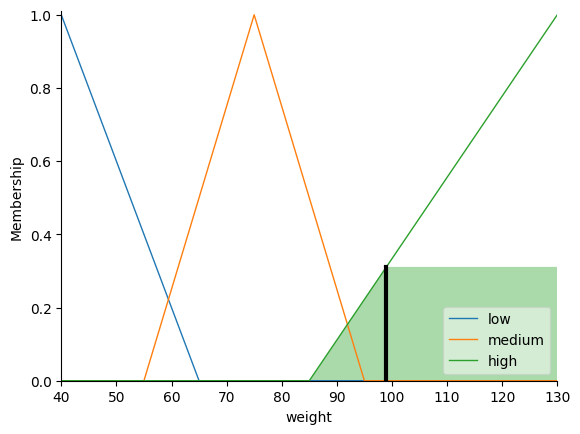

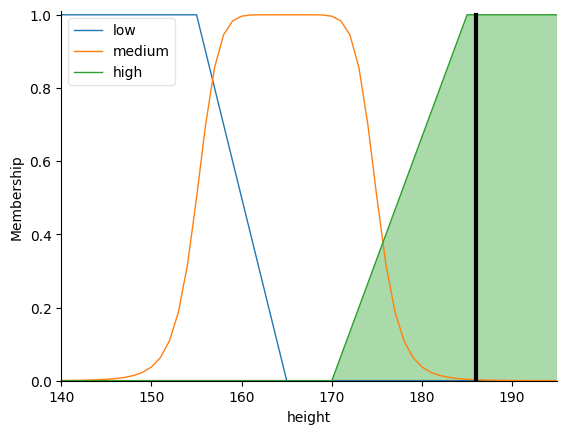

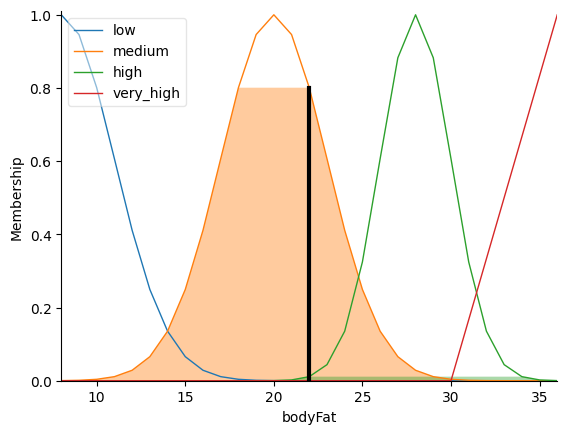

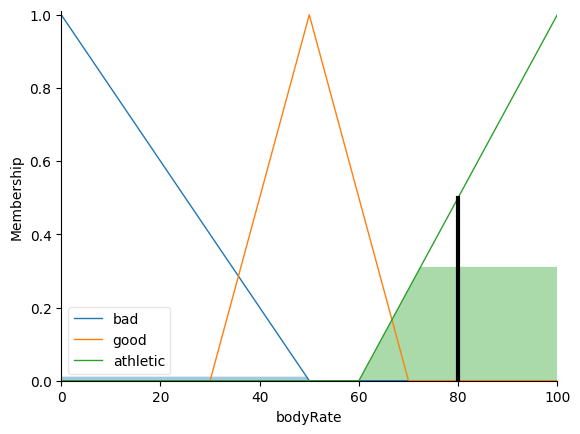

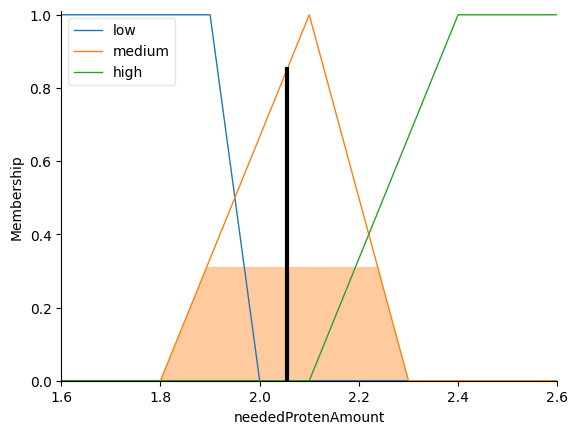

In [27]:

# 3) Build the simulation object
body_sim = ctrl.ControlSystemSimulation(body_ctrl_d)

# 4) Feed input values (for example, a 178 cm tall, 82 kg user with 22% body fat)
body_sim.input['height'] = 186
body_sim.input['weight'] = 99
body_sim.input['bodyFat'] = 22

# 5) Perform the computation
body_sim.compute()

# 6) Retrieve & display the results
print(f"Estimated Body Rate: {body_sim.output['bodyRate']:.2f}")
print(f"Needed Protein (g/kg): {body_sim.output['neededProtenAmount']:.2f}")

# 7) (Optional) Visualize the output membership activations
weight.view(sim=body_sim)
height.view(sim=body_sim)
bodyFat.view(sim=body_sim)
bodyRate.view(sim=body_sim)
neededProtenAmount.view(sim=body_sim)


In [30]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- UI widgets ---
height_slider = widgets.IntSlider(
    value=165, min=140, max=195, step=1,
    description='Height (cm):', continuous_update=False
)

weight_slider = widgets.IntSlider(
    value=75, min=40, max=130, step=1,
    description='Weight (kg):', continuous_update=False
)

bodyfat_slider = widgets.IntSlider(
    value=20, min=5, max=40, step=1,
    description='Body Fat (%):', continuous_update=False
)

run_button = widgets.Button(description="ابدأ التوليد 🧬", button_style='success')
output = widgets.Output()

# --- Button click handler ---
def on_run_button_clicked(b):
    with output:
        clear_output(wait=True)
        body_sim.input['height'] = height_slider.value
        body_sim.input['weight'] = weight_slider.value
        body_sim.input['bodyFat'] = bodyfat_slider.value
        body_sim.compute()
        print('')
        print(f"🚀 جاري التوليد بناءً على البيانات التالية:")
        print(f"📊 معدل الجسم المقدر: {body_sim.output['bodyRate']:.2f}")
        print(f"💪 كمية البروتين المطلوبة (غ/كجم): {body_sim.output['neededProtenAmount']:.2f}")

# Unbind any previous handlers using public API
run_button.on_click(on_run_button_clicked)

# --- Layout ---
ui = widgets.VBox([
    height_slider,
    weight_slider,
    bodyfat_slider,
    run_button,
    output
])

display(ui)


# Genetic Algorithm
## generate best meals based on fitness function

define meals list

In [34]:
meals = [
    ("Chicken Breast", 30, 0),
    ("Rice", 4, 40),
    ("Eggs", 12, 1),
    ("Oats", 6, 27),
    ("Whey Protein", 25, 2),
    ("Banana", 1, 23),
    ("Beef", 26, 0),
    ("Sweet Potato", 2, 20),
    ("Milk", 8, 12),
    ("Peanut Butter", 8, 6),
    ("Lentils", 18, 40),
    ("Greek Yogurt", 10, 7),
    ("Turkey Breast", 29, 0),
    ("Salmon", 20, 0),
    ("Tuna", 23, 0),
    ("Pork Chop", 25, 0),
    ("Tofu", 8, 2),
    ("Tempeh", 19, 9),
    ("Quinoa", 4, 21),
    ("Barley", 3.5, 28),
    ("Buckwheat", 3.4, 19.9),
    ("Chickpeas", 19, 61),
    ("Black Beans", 21, 62),
    ("Kidney Beans", 24, 60),
    ("Edamame", 11, 9),
    ("Broccoli", 2.8, 6.6),
    ("Spinach", 2.9, 3.6),
    ("Peas", 5.4, 14.5),
    ("Carrots", 0.9, 10),
    ("Sweet Corn", 3.4, 19),
    ("Potato", 2, 17),
    ("Whole Wheat Bread", 13, 43),
    ("White Bread", 9, 49),
    ("Bagel", 11, 56),
    ("Pasta", 5, 25),
    ("Couscous", 3.8, 23),
    ("Farro", 3.3, 46),
    ("Bulgur", 3.1, 17),
    ("Millet", 3.5, 23),
    ("Rye Bread", 8.5, 48),
    ("Feta Cheese", 14, 4),
    ("Cheddar Cheese", 25, 1.3),
    ("Mozzarella", 22, 2.2),
    ("Cottage Cheese", 11, 3.4),
    ("Goat Cheese", 21, 0.1),
    ("Ricotta", 11, 3.0),
    ("Parmesan", 38, 4.1),
    ("Almonds", 21, 22),
    ("Walnuts", 15, 14),
    ("Cashews", 18, 30),
    ("Pistachios", 20, 28),
    ("Hazelnuts", 14, 17),
    ("Pecans", 9, 14),
    ("Pumpkin Seeds", 19, 54),
    ("Sunflower Seeds", 21, 20),
    ("Flax Seeds", 18, 29),
    ("Chia Seeds", 17, 42),
    ("Hemp Seeds", 32, 9),
    ("Granola", 8, 64),
    ("Muesli", 11, 67),
    ("Protein Bar", 20, 30),
    ("Soy Milk", 7, 3),
    ("Almond Milk", 1, 3),
    ("Coconut Milk", 2, 6),
    ("Whole Egg", 6, 0.6),
    ("Egg White", 11, 0.7),
    ("Duck Eggs", 9, 1.3),
    ("Quail Eggs", 13, 1),
    ("Shrimp", 24, 0),
    ("Crab", 18, 0),
    ("Lobster", 19, 0),
    ("Scallops", 20, 5),
    ("Mussels", 24, 7),
    ("Clams", 25, 5),
    ("Oysters", 9, 5),
    ("Sardines", 25, 0),
    ("Anchovies", 29, 0),
    ("Herring", 19, 0),
    ("Mackerel", 19, 0),
    ("Tilapia", 26, 0),
    ("Cod", 18, 0),
    ("Haddock", 24, 0),
    ("Trout", 20, 0),
    ("Canned Tuna", 27, 0),
    ("Canned Salmon", 21, 0),
    ("Duck Breast", 19, 0),
    ("Lamb Chop", 26, 0),
    ("Venison", 29, 0),
    ("Bison", 20, 0),
    ("Rabbit", 21, 0),
    ("Ostrich", 29, 0),
    ("Kangaroo", 21, 0),
    ("Seitan", 75, 14),
    ("Navy Beans", 22, 62),
    ("Pinto Beans", 21, 27),
    ("Soybeans", 36, 30),
    ("Black Eyed Peas", 21, 21),
    ("Brown Rice", 2.6, 23),
    ("Wild Rice", 4, 21),
    ("Arborio Rice", 2.7, 28)
]

meals.extend([
    ("Apple", 0.3, 14),
    ("Orange", 0.9, 12),
    ("Grapes", 0.6, 18),
    ("Pear", 0.4, 15),
    ("Strawberries", 0.8, 8),
    ("Blueberries", 0.7, 14),
    ("Raspberries", 1.2, 12),
    ("Blackberries", 2.0, 10),
    ("Mango", 0.8, 15),
    ("Pineapple", 0.5, 13),
    ("Kiwi", 1.1, 15),
    ("Peach", 0.9, 10),
    ("Apricot", 1.4, 11),
    ("Watermelon", 0.6, 8),
    ("Cantaloupe", 0.8, 9),
    ("Cherries", 1.1, 16),
    ("Plums", 0.7, 11),
    ("Figs", 3.3, 19),
    ("Dates", 2.5, 75),
    ("Guava", 2.6, 14),
    ("Papaya", 0.5, 11),
    ("Pomegranate", 1.7, 19),
    ("Brussels Sprouts", 3.4, 9),
    ("Kale", 4.3, 4),
    ("Asparagus", 2.2, 3.9),
    ("Cauliflower", 1.9, 5),
    ("Zucchini", 1.2, 3.1),
    ("Eggplant", 1.0, 6),
    ("Bell Pepper", 1.3, 6),
    ("Tomato", 0.9, 3.9),
    ("Cucumber", 0.7, 3.6),
    ("Beetroot", 1.6, 10),
    ("Celery", 0.7, 3),
    ("Lettuce", 1.4, 2.9),
    ("Arugula", 2.6, 3.7),
    ("Collard Greens", 3.0, 7),
    ("Artichoke", 3.3, 11),
    ("Button Mushrooms", 3.1, 3.3),
    ("Shiitake Mushrooms", 2.2, 7),
    ("Portobello Mushrooms", 3.1, 4.3),
    ("Yam", 1.5, 28),
    ("Plantain", 1.3, 32),
    ("Kefir", 3.3, 4),
    ("Nori Seaweed", 5.8, 5.1),
    ("Spirulina Powder", 57, 24),
    ("Nutritional Yeast", 50, 33),
    ("Hummus", 8, 14),
    ("Olive Oil", 0, 0),
    ("Coconut Water", 0.7, 9),
    ("Kimchi", 1.1, 2.4)
])



define algorithm parameter values

In [35]:
# قائمة الوجبات: (الاسم، بروتين، كاربوهيدرات
# أهداف اللاعب اليومية
target_protein = 155  # بالـغرام
target_carb = 136     # بالـغرام

# إعدادات الخوارزمية الجينية
num_meals = len(meals)
population_size = 100
generations = 55
mutation_rate = 0.5
crossover_rate = 0.5

In [36]:
import random
import math

craeat random meals function 

In [37]:
MIN_MEALS = 5
MAX_MEALS = 8

def create_individual():
    # نختار عدد وجبات بين MIN_MEALS و MAX_MEALS
    k = random.randint(MIN_MEALS, MAX_MEALS)
    # نختار k من المؤشرات بدون تكرار
    one_indices = random.sample(range(num_meals), k)
    # نبني الفرد بوضع 1 عند هذه المؤشرات و 0 في الباقي
    individual = [1 if i in one_indices else 0 for i in range(num_meals)]
    
    #print(individual)   # اختياري، للتأكد
    #print(fitness(individual))
    return individual


print result function

In [38]:
from pprint import pprint

def print_result_meals(best):
    """اطبع أفضل خطة وجبات والملخص الغذائي الخاص بها"""
    selected = [(meals[i][0], meals[i][1], meals[i][2])
                for i, gene in enumerate(best) if gene]

    print("\n✅ Best Meal Plan Found:")
    for name, protein, carb in selected:
        print(f"- {name:25} P: {protein:>4}g, C: {carb:>4}g")

    total_protein = sum(p for _, p, _ in selected)
    total_carb    = sum(c for _, _, c in selected)
    print(f"\nTotal Protein: {total_protein}g (Target: {target_protein}g)")
    print(f"Total Carbs:   {total_carb}g (Target: {target_carb}g)")

# مثال على الاستخدام
# بعد الانتهاء من تشغيل الخوارزمية الجينية، يمكنك طباعـة:



crossover function

In [39]:
import random

# pro function 
def crossover(parent1, parent2, crossover_rate=0.8):
    if random.random() < crossover_rate:
        child1 = []
        child2 = []

        for i in range(len(parent1)):
            if parent1[i] == 1 and parent2[i] == 1:
                child1.append(1)
                child2.append(1)
            else:
                rand_val = random.random()
                val = 1 if rand_val > 0.5 else 0
                child1.append(val)
                child2.append(val)

        return child1, child2
    
    # في حال لم يتحقق شرط معدل التهجين، نرجّع الآباء كما هم
    return parent1[:], parent2[:]


# dummy function 

# def crossover(parent1, parent2):
#     if random.random() < crossover_rate:
#         point = random.randint(1, num_meals - 1)
#         return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]
#     return parent1[:], parent2[:]

select parent function 

In [40]:
# اختيار فرد باستخدام طريقة البطولة
def tournament_selection(population, k=8):
    selected = random.sample(population, k)
    selected.sort(key=fitness)  # الأصغر هو الأفضل
    return selected[0]

fitness function 

In [41]:

# دالة تقييم الحل (كلما اقتربت من الأهداف زادت الجودة)
def fitness(individual):
    total_protein = sum(meal[1] for gene, meal in zip(individual, meals) if gene)
    total_carb = sum(meal[2] for gene, meal in zip(individual, meals) if gene)

    protein_diff = target_protein - total_protein
    carb_diff = target_carb - total_carb

    distance = protein_diff**2 + carb_diff**2
    return int(math.sqrt(distance)) if distance != 0 else 0.01

mutate function 

In [42]:
# طفرة: قلب الجين 0↔1
# def mutate(individual):
#     for i in range(num_meals):
#         if random.random() < mutation_rate:
#             individual[i] = 1 - individual[i]
 

def mutate(individual, mutation_rate=0.2):
    # تحقق من شرط معدل الطفرة
    if random.random() < mutation_rate:
        # تحديد مواقع 1 و 0 في القائمة
        ones_indices = [i for i, val in enumerate(individual) if val == 1]
        zeros_indices = [i for i, val in enumerate(individual) if val == 0]

        # نتأكد أن هناك عناصر كافية لتطبيق العملية
        if len(ones_indices) >= 2 and len(zeros_indices) >= 2:
            num_mutations = random.randint(2, min(4, len(ones_indices), len(zeros_indices)))

            # اختيار مواقع عشوائية لتحويلها من 1 إلى 0
            ones_to_flip = random.sample(ones_indices, num_mutations)
            # اختيار مواقع عشوائية لتحويلها من 0 إلى 1
            zeros_to_flip = random.sample(zeros_indices, num_mutations)

            for i in ones_to_flip:
                individual[i] = 0

            for i in zeros_to_flip:
                individual[i] = 1

    # في حال لم يتحقق شرط mutation_rate، يتم إعادة القائمة كما هي
    return individual



In [43]:
import matplotlib.pyplot as plt

def plot_chromosome(individual):
    plt.figure(figsize=(12, 2))
    plt.bar(range(len(individual)), individual, color=['green' if g else 'lightgray' for g in individual])
    plt.xlabel("Meal Index")
    plt.ylabel("Selected (1) / Not Selected (0)")
    plt.title("Chromosome Visualization")
    plt.yticks([0, 1])
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

def plot_chromosome_heatmap(individual):
    plt.figure(figsize=(12, 1))
    sns.heatmap([individual], cmap="Greens", cbar=False, linewidths=0.5, linecolor='gray')
    plt.title("Chromosome Heatmap")
    plt.yticks([])
    plt.xticks(ticks=range(len(individual)), labels=range(len(individual)), rotation=90)
    plt.show()



def visualize_chromosome(individual):
    print("Chromosome Representation:")
    print("Index: ", ' '.join([str(i).rjust(2) for i in range(len(individual))]))
    print("Genes: ", ' '.join([str(g).rjust(2) for g in individual]))
    print("Selected meals:", [i for i, g in enumerate(individual) if g])



Chromosome Representation:
Index:   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
Genes:   0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
Selecte

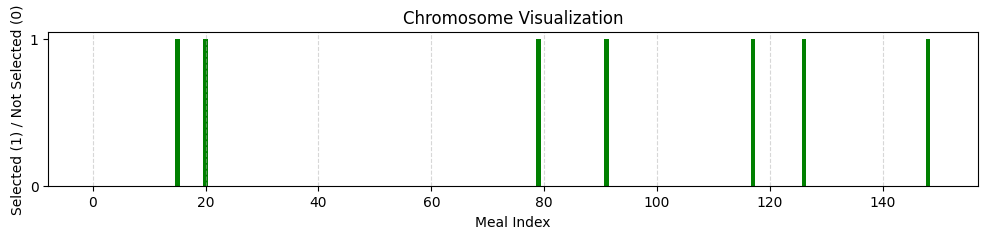

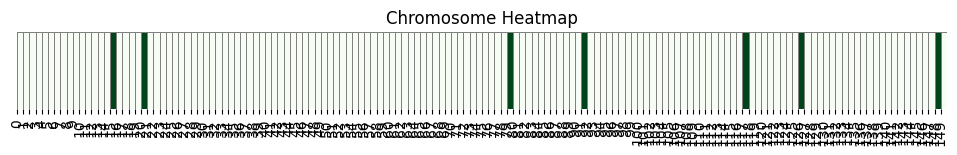

In [44]:
individual = create_individual()
visualize_chromosome(individual)


individual = create_individual()
plot_chromosome(individual)


plot_chromosome_heatmap(individual)


In [49]:

# الخوارزمية الجينية
def genetic_algorithm():
    # الخطوة 1: إنشاء الجيل الأول
    population = [create_individual() for _ in range(population_size)]

    for gen in range(generations):
        new_population = []

        for _ in range(population_size // 2):
            # الخطوة 2: اختيار الوالدين (باستخدام البطولة)
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)
        
            # الخطوة 3: تزاوج لإنتاج طفلين
            child1, child2 = crossover(parent1, parent2)

            # الخطوة 4: تطبيق الطفرة على كل طفل
            mutate(child1)
            mutate(child2)

            # الخطوة 5: إضافة الأطفال إلى الجيل الجديد
            new_population.append(child1)
            new_population.append(child2)

        # الخطوة 6: استبدال الجيل القديم بالجيل الجديد
        population = new_population

        # اختيار أفضل فرد في هذا الجيل
        # best = min(population, key=fitness)
        # print(f"Generation {gen+1}: Best Fitness = {fitness(best)}")

    # الخطوة 7: طباعة أفضل خطة وجبات في النهاية
    best = min(population, key=fitness)
    print_result_meals(best)
    print("Final Fitness:", fitness(best))



# تشغيل الخوارزمية
genetic_algorithm()



✅ Best Meal Plan Found:
- Beef                      P:   26g, C:    0g
- Tofu                      P:    8g, C:    2g
- Bagel                     P:   11g, C:   56g
- Hazelnuts                 P:   14g, C:   17g
- Soybeans                  P:   36g, C:   30g
- Cherries                  P:  1.1g, C:   16g
- Spirulina Powder          P:   57g, C:   24g

Total Protein: 153.1g (Target: 155g)
Total Carbs:   145g (Target: 136g)
Final Fitness: 9


In [46]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def create_nutrition_input_ui(run_algorithm_callback):
    # Sliders for protein and carbs
    protein_slider = widgets.IntSlider(
        value=150,
        min=20,
        max=300,
        step=1,
        description='Protein (g):',
        continuous_update=False
    )

    carb_slider = widgets.IntSlider(
        value=200,
        min=20,
        max=300,
        step=1,
        description='Carbs (g):',
        continuous_update=False
    )

    # Button to run the genetic algorithm
    run_button = widgets.Button(description="ابدأ التوليد 🧬", button_style='success')

    # Output area to show result
    output = widgets.Output()

    # Button click handler
    def on_run_button_clicked(b):
        with output:
            clear_output()
            print(f"🚀 جاري التوليد مع الأهداف التالية:")
            print(f"- البروتين المطلوب: {protein_slider.value}g")
            print(f"- الكاربوهيدرات المطلوبة: {carb_slider.value}g\n")
            # Call user-defined function to run the algorithm
            run_algorithm_callback(protein_slider.value, carb_slider.value)

    run_button.on_click(on_run_button_clicked)

    # Layout the UI
    ui = widgets.VBox([
        protein_slider,
        carb_slider,
        run_button,
        output
    ])
    display(ui)


In [47]:
def run_my_algorithm(protein_target, carb_target):
    global target_protein, target_carb
    target_protein = protein_target
    target_carb = carb_target
    genetic_algorithm()  # تأكد أن هذه الدالة موجودة وتعرض النتائج باستخدام print_result_meals


In [ ]:
def update_targets(protein, carb):
    global target_protein, target_carb
    target_protein = protein
    target_carb = carb
    print("Targets updated!")

create_nutrition_input_ui(run_my_algorithm)

